In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

df=pd.read_csv('train.csv')

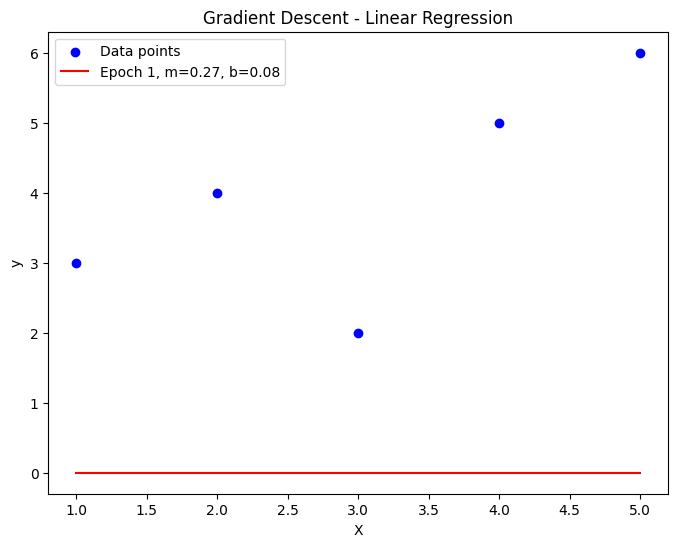

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (x, y)
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 5, 6])

# Initialize parameters
m = 0
b = 0
alpha = 0.01
epochs = 100
n = len(X)

# Function to compute predictions
def predict(X, m, b):
    return m * X + b

# Plotting setup
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(epochs):
    y_pred = predict(X, m, b)
    error = y_pred - y

    # Compute gradients
    m_grad = (2/n) * np.dot(error, X)
    b_grad = (2/n) * np.sum(error)

    # Update weights
    m -= alpha * m_grad
    b -= alpha * b_grad

    # Plot
    ax.clear()
    ax.scatter(X, y, color='blue', label='Data points')
    ax.plot(X, y_pred, color='red', label=f'Epoch {i+1}, m={m:.2f}, b={b:.2f}')
    ax.set_title('Gradient Descent - Linear Regression')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    plt.pause(0.1)  # Pause to visualize each step

plt.ioff()
plt.show()


In [37]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
df.shape
##

(58592, 44)

In [39]:
df.drop(['policy_id'], axis=1, inplace=True)

In [40]:
df.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [41]:
df.shape

(58592, 43)

In [42]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [43]:
df.duplicated().sum()  

np.int64(0)

In [44]:
import re

def extract_power(power_str):
    try:
        text = str(power_str)  # Ensure it's a string
        match = re.search(r'([\d.]+)[a-zA-Z]+@(\d+)', text)
        if match:
            value = float(match.group(1))
            rpm = int(match.group(2))
            return value, rpm
    except:
        pass
    return None, None

# Apply to the column and split into two new columns
df[['power_value', 'power_rpm']] = df['max_power'].apply(lambda x: pd.Series(extract_power(x)))
df[['torque_value', 'torque_rpm']] = df['max_torque'].apply(lambda x: pd.Series(extract_power(x)))
df.drop(['max_power', 'max_torque'], axis=1, inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,power_value,power_rpm,torque_value,torque_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0,40.36,6000.0,60.0,3500.0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0,40.36,6000.0,60.0,3500.0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0,40.36,6000.0,60.0,3500.0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,2,0,88.50,6000.0,113.0,4400.0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,No,Yes,Yes,Yes,2,0,67.06,5500.0,91.0,4250.0


In [45]:
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])
    

In [46]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,power_value,power_rpm,torque_value,torque_rpm
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,6,...,0,0,0,1,0,0,40.36,6000.0,60.0,3500.0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,6,...,0,0,0,1,0,0,40.36,6000.0,60.0,3500.0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,6,...,0,0,0,1,0,0,40.36,6000.0,60.0,3500.0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,2,...,1,1,1,1,2,0,88.50,6000.0,113.0,4400.0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,0,...,0,1,1,1,2,0,67.06,5500.0,91.0,4250.0


In [47]:
features=df.drop('is_claim', axis=1)
target=df['is_claim']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


knn_pipeline = Pipeline([
    ('scaled_array', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5)
knn_grid.fit(x_train, y_train)

print("\n KNN Best Params:", knn_grid.best_params_)
print(" KNN Test Accuracy:", knn_grid.score(x_test, y_test))
print(" KNN CV Mean Score:", knn_grid.best_score_)

nb_pipeline = Pipeline([
    ('scaled_array', StandardScaler()),
    ('nb', GaussianNB())
])
nb_params = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7]
}
nb_grid = GridSearchCV(nb_pipeline, nb_params, cv=5)
nb_grid.fit(x_train, y_train)

print("\n Naive Bayes Best Params:", nb_grid.best_params_)
print(" Naive Bayes Test Accuracy:", nb_grid.score(x_test, y_test))
print(" Naive Bayes CV Mean Score:", nb_grid.best_score_)

dt_pipeline = Pipeline([
    ('scaled_array', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])
dt_params = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5)
dt_grid.fit(x_train, y_train)

print("\n Decision Tree Best Params:", dt_grid.best_params_)
print(" Decision Tree Test Accuracy:", dt_grid.score(x_test, y_test))
print(" Decision Tree CV Mean Score:", dt_grid.best_score_)


 KNN Best Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
 KNN Test Accuracy: 0.9352333816878573
 KNN CV Mean Score: 0.9359759311571013

 Naive Bayes Best Params: {'nb__var_smoothing': 1e-09}
 Naive Bayes Test Accuracy: 0.9354893762266405
 Naive Bayes CV Mean Score: 0.9361679448118911

 Decision Tree Best Params: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_split': 2}
 Decision Tree Test Accuracy: 0.9354893762266405
 Decision Tree CV Mean Score: 0.9361679448118911
